<a href="https://colab.research.google.com/github/srirakshareddy/Automated-Resume-Screening/blob/main/Resume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
####################################################### Importing Libraries #######################################
import numpy as np
import string
import random
from tqdm.notebook import tqdm
!pip install num2words
from num2words import num2words
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics.pairwise import cosine_similarity

import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=cfe1bec569601cb30260854d084357eb9fc2a79a391e07c7e5bfea80d5259b87
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
######################################################## data cleaning ################################################################

def data_cleaning(words): # funcion to call all other cleaning function
    words = convert_to_lower_case(words)
    words = remove_non_ascii_characters(words)
    # words = replace_numbers_with_words(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    # words = stem_words(words)
    words = lemmatize_verbs(words)
    words = remove_long_words(words)
    return words


def convert_to_lower_case(words): # converting string to lower case
    new_words = []
    for word in words:
        new_word = word.lower()   # .lower() converts string to lower case
        new_words.append(new_word)
    return new_words


def remove_non_ascii_characters(words): # removing non ascii characters from tokens
    new_words = []
    for word in words:
        string_encode = word.encode("ascii", "ignore") #encoding string
        string_decode = string_encode.decode() #decoding string
        new_words.append(string_decode)
    return new_words


# def replace_numbers_with_words(words):
#     new_words = []
#     for word in words:
#         if word.isdigit():
#             new_word = num2words(word)
#             new_words.append(new_word)
#         else:
#             new_words.append(word)
#     return new_words


def remove_punctuation(words): # removing punctuations from string
    new_words = []
    for word in words:
        new_word = word.translate(str.maketrans("", "", string.punctuation))
        if new_word != '':
            new_words.append(new_word)
    return new_words


def remove_stopwords(words): # removing stop words
    new_words = []
    for word in words:
        if word not in stopwords.words('english'): # removing stop words from english language
            new_words.append(word)
    return new_words


# def stem_words(words):
#     stemmer = LancasterStemmer()
#     stems = []
#     for word in words:
#         stem = stemmer.stem(word)
#         stems.append(stem)
#     return stems


def lemmatize_verbs(words): # lemmatizing string
    lemmatizer = WordNetLemmatizer() # grouping together the different inflected forms of a word
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def remove_long_words(words): # removing meeningless long random words 
  new_words = []
  for word in words:
    if len(word) < 12: # words with length > 12 are removed
      new_words.append(word)
  return new_words

# def remove_non_english_words(words):



In [ ]:
################################## creating dataframe - resume_dataset.csv ###################################
# df_resumes_main = pd.read_csv("/content/drive/MyDrive/FINAL PROJECT/CODE/distil bert/Dataset II.csv",index_col="ID")

################################## creating dataframe - resume_dataset.csv ###################################
df_resumes_main = pd.read_csv("/content/drive/MyDrive/FINAL PROJECT/CODE/Train Test/Dataset II/train II.csv")

In [ ]:
nltk.download('omw-1.4')



[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df_resumes = df_resumes_main.Resume # extracting resumes from dataframe
cleaned_resumes = []
for resume in df_resumes:
    tokens = nltk.word_tokenize(resume) #tokenizing the string of resume
    resume = data_cleaning(tokens) #calling data cleaning function to clean the resume tokens
    cleaned_resumes.append(resume) # appending cleaned resume tokens into a new list
# print(len(cleaned_resumes))

In [ ]:
# print(type(cleaned_resumes))

In [ ]:
###################################### visualizing the dataframe#############
df_resumes_main # dataframe before cleaning

,Unnamed: 0,Category,Resume
0,468,Automation_Testing,* Excellent grasping power in learning new con...
1,857,Blockchain,Hobbies â¢ Playing Chess â¢ Solving Rubik's ...
2,549,Operations_Manager,IT SKILLS â¢ Well versed with MS Office and I...
3,280,Health_and_fitness,SKILLS: Computer: â¢ Can easily operate in Op...
4,109,Arts,I Other Skills Course/Skill Name Board Year Of...
...,...,...,...
764,106,Arts,"Additional qualifications April 2000, Web Desi..."
765,270,Health_and_fitness,Education Details \r\nMay 2014 Diploma Nutriti...
766,860,Blockchain,"SOFTWARE SKILLS: Languages: C, C++ & java Oper..."
767,435,SAP_Developer,Education Details \r\nJanuary 2016 Bachelor Of...


In [ ]:
df_resumes_main = df_resumes_main.drop('Resume', 1) # dropping the uncleaned column of resumes from dataframe
print("Dropped")

Dropped


<ipython-input-9-c98031d1d424>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_resumes_main = df_resumes_main.drop('Resume', 1) # dropping the uncleaned column of resumes from dataframe


In [ ]:

flat_list = []

nltk.download('words')
words = set(nltk.corpus.words.words())

for resume in cleaned_resumes: # joining back tokens to make a string back
  flat_string = ' '.join(map(str, resume)) 

  # eng_words = " ".join(w for w in nltk.wordpunct_tokenize(flat_string) if w.lower() in words or not w.isalpha())


  flat_list.append(flat_string)

# final_flat_list = sorted(set(flat_list), key=lambda x:flat_list.index(x))


print(flat_list[0])

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


excellent grasp power learn new concepts technology highly motivate team player strong work ethics commit hard work ability work coordinate team effectively selfstarter team player quick independent detail january 2014 bachelor technology information technology branch bput university january 2010 diploma engineer brahmapur orissa ucp engineer school software test automation engineer software test automation engineer tech mahindra skill detail company detail company tech mahindra description india duration oct 2017 till date project description bt group plc trade bt formerly british telecom british hold company head offices london unite kingdom work air logistics program banner british telecom project handle web carry whole logistics operation unite kingdom various airlines roles design develop framework test scenarios test case develop automation test script exist application execute test case every new release involve run test case log defect hpqc tool involve formulate test summary r

In [ ]:
df_resumes_main['Resume'] = flat_list # adding cleaned list of resumes to the dataframe
print("Resume Updated")

Resume Updated


In [ ]:
df_resumes_main # printing cleaned dataframe

,Unnamed: 0,Category,Resume
0,468,Automation_Testing,excellent grasp power learn new concepts techn...
1,857,Blockchain,hobbies play chess solve rubik cube watch seri...
2,549,Operations_Manager,skills well verse ms office internet various e...
3,280,Health_and_fitness,skills computer easily operate operate system ...
4,109,Arts,skills courseskill name board year pass grade ...
...,...,...,...
764,106,Arts,additional april 2000 web design course averag...
765,270,Health_and_fitness,education detail may 2014 diploma nutrition ed...
766,860,Blockchain,software skills languages c c java operate sys...
767,435,SAP_Developer,education detail january 2016 bachelor enginee...


In [ ]:
# df_resumes_main.to_csv("cleaned_data.csv") # saving cleaned dataframe to csv
# print('DF Stored to CSV')

In [ ]:
col = ['Category', 'Resume'] #defining column names for dataframe
df = df_resumes_main[col] # extracting two columns from dataframe
df = df[pd.notnull(df['Resume'])] #Detect non-missing values
df.columns = ['Category', 'Resume'] # column labels
df['category_id'] = df['Category'].factorize()[0] # creating category id columns and converting category column to numbers( label encoding)
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id') # dropping dupicate values and sorting category_id wise
category_to_id = dict(category_id_df.values) # converting category to id
id_to_category = dict(category_id_df[['category_id', 'Category']].values) # id to category

df.head()

,Category,Resume,category_id
0,Automation_Testing,excellent grasp power learn new concepts techn...,0
1,Blockchain,hobbies play chess solve rubik cube watch seri...,1
2,Operations_Manager,skills well verse ms office internet various e...,2
3,Health_and_fitness,skills computer easily operate operate system ...,3
4,Arts,skills courseskill name board year pass grade ...,4


In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1,2), stop_words='english') #The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings
features = tfidf.fit_transform(df.Resume).toarray() # scalling the training data
labels = df.category_id # generating labels
features.shape


(769, 21365)

In [ ]:
category = df_resumes_main.groupby("Category") # grouping daafframe by category
for key, item in category:
    print(category.get_group(key))

     Unnamed: 0  Category                                             Resume
16          101  Advocate  skills legal write efficient researcher legal ...
27           97  Advocate  education detail november 2016 january 2019 ll...
37           84  Advocate  technical windows ms detail llb guwahati assam...
123          90  Advocate  skills natural languages proficient english hi...
234          92  Advocate  good grasp quality skillful work education det...
236          89  Advocate  computer detail january 2001 january 2003 mast...
244          94  Advocate  technical windows ms detail llb guwahati assam...
256         100  Advocate  skills natural languages proficient english hi...
307          93  Advocate  hard work quick detail june 2014 may 2017 llb ...
448         103  Advocate  hard work quick detail june 2014 may 2017 llb ...
578          85  Advocate  education detail bcom llb university clacutta ...
592          95  Advocate  education detail bcom llb university clacutta ...

In [ ]:

start_time = time.time()


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['Resume'], df['Category'], random_state = 0,) # dividing data into train and test

#print(x_train)

cnt_vec = CountVectorizer() # bag-of-ngrams model , based on frequency count
x_train_cnt = cnt_vec.fit_transform(x_train)

tfidf_transformer = TfidfTransformer() #passing the word:word count
x_train_tfidf = tfidf_transformer.fit_transform(x_train_cnt)

classifier = MultinomialNB().fit(x_train_tfidf, y_train)


In [ ]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]


CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
ls1 = []
for model in models:
    model_type = model.__class__.__name__
    accuracy = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for idx, acc in enumerate(accuracy):
        ls1.append((model_type, idx, acc))
cv_df = pd.DataFrame(ls1, columns=['model_type', 'fold_idx', 'accuracy'])


In [ ]:
cv_df.groupby('model_type').accuracy.max()


model_type
LinearSVC                 1.000000
LogisticRegression        1.000000
MultinomialNB             0.954545
RandomForestClassifier    0.649351
Name: accuracy, dtype: float64

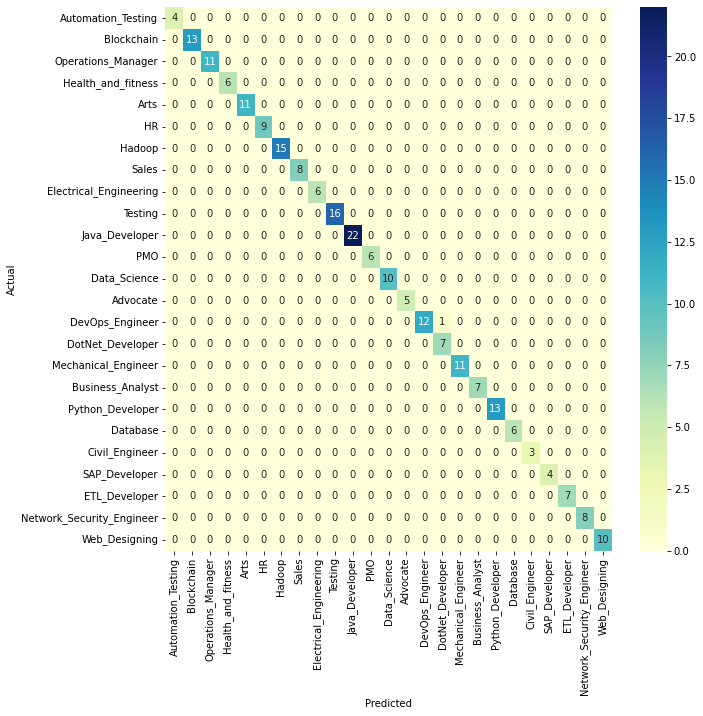

In [ ]:
model = LinearSVC() #model
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_resumes_main.index, test_size=0.30, random_state=0) # dividing into train and test
model.fit(X_train, y_train) # fitting the model
y_pred = model.predict(X_test) # predicting using test set

conf_mat = confusion_matrix(y_test, y_pred) # accuracy check using confusion matrix
fig, ax = plt.subplots(figsize=(10,10)) # plotting 
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu",
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values) # generating heat map
plt.ylabel('Actual') #x label of plot
plt.xlabel('Predicted') # y label of plot
plt.show() # displaying plot


In [ ]:

print("Processing Time ---> %s seconds <---" % (time.time() - start_time))



Processing Time ---> 53.0504846572876 seconds <---


In [ ]:

start_time = time.time()


In [ ]:
########################### importing libraries for BERT ######################################
!pip install transformers
from transformers import BertTokenizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from torch.utils.data import TensorDataset
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import f1_score

model_name = "bert-base-uncased"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 111.9 MB/s eta 0:00:00


In [ ]:
# initializing bert tokenizer 
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)

In [ ]:
# encoding the resumes using pretrained tokenizer
train_encodings = tokenizer(df.Resume.tolist(), truncation=True, padding=True)


In [ ]:
train_encodings = tokenizer.batch_encode_plus(
    df.Resume.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
        max_length=512,
    return_tensors='pt'
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# getting input ids, mask, and train labels from the train_encodings
input_ids_train = train_encodings['input_ids']
attention_masks_train = train_encodings['attention_mask']
labels_train = torch.tensor(np.array(labels))

In [ ]:
# converting it to tensor dataset
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)

In [ ]:
# # defining the model original final trial
# model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
#                                                       num_labels=len(labels),
#                                                       output_attentions=False,
#                                                       output_hidden_states=False)

model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=26,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

# ## for re-training
# path = "/content/drive/MyDrive/FINAL PROJECT/CODE/Saved Models/bert_on_dataset_II.pt"
# model.load_state_dict(torch.load(path,map_location=torch.device('cpu')))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
# defining the batch size and dataloader
batch_size = 3
dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

In [ ]:
# initializing the AdamW optimizer, epochs and scheduler
optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
# epochs = 5 ## original
epochs = 20

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
print(labels)

0       0
1       1
2       2
3       3
4       4
       ..
764     4
765     3
766     1
767    21
768    13
Name: category_id, Length: 769, dtype: int64


In [ ]:
# function to get f1_score
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')


In [ ]:
# # initializing the torch parameters 
# seed_val = 17
# random.seed(seed_val)
# np.random.seed(seed_val)
# torch.manual_seed(seed_val)
# torch.cuda.manual_seed_all(seed_val)
# #specifing the GPU
# device = torch.device('cuda')
# model.to(device)
# #list for getting bert accuracy
# bert_acc = []
# #function to evaluate model
# def evaluate(dataloader_val):

#     model.eval()
    
#     loss_val_total = 0
#     predictions, true_vals = [], []
#     #looping for each batch in batch dataloader
#     for batch in dataloader_val:
#         device = torch.device('cuda')
        
#         batch = tuple(b.to(device) for b in batch)
#         # specifing the input 
#         inputs = {'input_ids':      batch[0],
#                   'attention_mask': batch[1],
#                   'labels':         batch[2],
#                  }

#         with torch.no_grad():        
#             outputs = model(**inputs)
#         # getting the loss variables     
#         loss = outputs[0]
#         logits = outputs[1]
#         loss_val_total += loss.item()
#         # transfer the loss to cpu for calculating loss avg and return
#         logits = logits.detach().cpu().numpy()
#         label_ids = inputs['labels'].cpu().numpy()
#         predictions.append(logits)
#         true_vals.append(label_ids)
    
#     loss_val_avg = loss_val_total/len(dataloader_val) 
    
#     predictions = np.concatenate(predictions, axis=0)
#     true_vals = np.concatenate(true_vals, axis=0)
#     # returning the values        
#     return loss_val_avg, predictions, true_vals
# # looping for each epochs    

# training_loss = []
# validation_loss = []
# f1_score_BERT = []
# for epoch in tqdm(range(1, epochs+1)):
#     # training the model
#     model.train()
#     loss_train_total = 0

#     progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
#     for batch in progress_bar:

#         model.zero_grad()
#         device = torch.device('cuda')
#         batch = tuple(b.to(device) for b in batch)
#         inputs = {'input_ids':      batch[0],
#                   'attention_mask': batch[1],
#                   'labels':         batch[2],
#                  }       

#         outputs = model(**inputs)
        
#         loss = outputs[0]
#         loss_train_total += loss.item()
#         loss.backward()

#         torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

#         optimizer.step()
#         scheduler.step()
        
#         progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
#     # saving model for each epochs    
#     torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
        
#     tqdm.write(f'\nEpoch {epoch}')
#     # calculating the training loss
#     loss_train_avg = loss_train_total/len(dataloader_train)            
#     tqdm.write(f'Training loss: {loss_train_avg}')
#     training_loss.append(loss_train_avg)
#     # Calculating the Vaidation loss and F1 Score.
#     val_loss, predictions, true_vals = evaluate(dataloader_train)
#     val_f1 = f1_score_func(predictions, true_vals)
#     tqdm.write(f'Validation loss: {val_loss}')
#     validation_loss.append(val_loss)
#     tqdm.write(f'F1 Score (Weighted): {val_f1}')
#     f1_score_BERT.append(val_f1)
#     # appending the results to the bert accuracy list.
#     bert_acc.append(("BERT", epoch-1, val_f1))
#     if f1_score_BERT == val_f1[-1]:
#       break;

In [ ]:
# initializing the torch parameters 
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
#specifing the GPU
device = torch.device('cuda')
model.to(device)
#list for getting bert accuracy
bert_acc = []
#function to evaluate model
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    #looping for each batch in batch dataloader
    for batch in dataloader_val:
        device = torch.device('cuda')
        
        batch = tuple(b.to(device) for b in batch)
        # specifing the input 
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
        # getting the loss variables     
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()
        # transfer the loss to cpu for calculating loss avg and return
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
    # returning the values        
    return loss_val_avg, predictions, true_vals
# looping for each epochs    

training_loss = []
validation_loss = []
f1_score_BERT = []
for epoch in tqdm(range(1, epochs+1)):
    # training the model
    model.train()
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        device = torch.device('cuda')
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
    # saving model for each epochs    
    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    # calculating the training loss
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    training_loss.append(loss_train_avg)
    # Calculating the Vaidation loss and F1 Score.
    val_loss, predictions, true_vals = evaluate(dataloader_train)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    validation_loss.append(val_loss)
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    f1_score_BERT.append(val_f1)
    # appending the results to the bert accuracy list.
    bert_acc.append(("BERT", epoch-1, val_f1))
    

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/257 [00:00<?, ?it/s]


Epoch 1
Training loss: 3.004424120201675
Validation loss: 2.52183395832893
F1 Score (Weighted): 0.4238637411540603


Epoch 2:   0%|          | 0/257 [00:00<?, ?it/s]


Epoch 2
Training loss: 2.1583704674754163
Validation loss: 1.5292017803117923
F1 Score (Weighted): 0.847622701495509


Epoch 3:   0%|          | 0/257 [00:00<?, ?it/s]


Epoch 3
Training loss: 1.3514394015653588
Validation loss: 0.8874706558680256
F1 Score (Weighted): 0.9634499261561041


Epoch 4:   0%|          | 0/257 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:

print("Processing Ti    me For BERT ---> %s seconds <---" % (time.time() - start_time))



In [ ]:
# combining both accuracy dataframes to single results dataframe
cv_df2 = pd.DataFrame(bert_acc, columns=['model_type', 'fold_idx', 'accuracy'])
results = cv_df2.append(cv_df)
results = results.replace('RandomForestClassifier', 'Random Forest')
results = results.replace('LogisticRegression', 'LR')

## kaggle link

 https://www.kaggle.com/datasets/jillanisofttech/updated-resume-dataset/code


In [ ]:
sns.boxplot(x='model_type', y='accuracy', data=results) # plotting accuracies of different models
sns.stripplot(x='model_type', y='accuracy', data=results, 
              size=8, jitter=True,edgecolor="gray", linewidth=2)
# plt.show()
print(results)


In [ ]:
# df_jd_final = pd.read_excel('/content/drive/MyDrive/FINAL PROJECT/CODE/JD_final.xlsx', index_col="Job_Title") # job description to dataframe

# df_jd_final

In [ ]:
# print("Select Job Title to rank the resumes:")
# i=1
# for job_title in df_jd_final.index.unique(): # unique elements in job_title
#   print(i,"\t",job_title)
#   i+=1/8

# title = input("Enter Job Title:")

In [ ]:
# job_description = df_jd_final.loc[title][0]
# resumes_of_title = category.get_group(title)["Resume"].tolist()

In [ ]:
# tfidf_vectorizer = TfidfVectorizer(analyzer="char")

# sparse_matrix = tfidf_vectorizer.fit_transform([job_description]+resumes_of_title) # generating sparse matrix
# cosine = cosine_similarity(sparse_matrix[0,:],sparse_matrix[1:,:]) #finding cosine similarities

# dictionary = dict(zip(cosine.tolist()[0],resumes_of_title)) # cosine similarities to keys and resumes to values of a dictionary

# dictionary

In [ ]:
# ranked_df = pd.DataFrame(list(dictionary.items()),columns = ['Cosine_Similarity','Resume']) # dictionary to dataframe
# ranked_df = ranked_df.set_index('Cosine_Similarity') # changing index to cosine similarity
# cosine_ranked_df = ranked_df.sort_index(ascending=False) # sorting index to get ranks
# cosine_ranked_df

In [ ]:
# resume_list = cosine_ranked_df.Resume.to_list() #resumes to list
# index_list_cosine =  cosine_ranked_df.index.to_list() # cosine values to list

# experience_list = []

# ########################################################### extracting experience from resume#############################################################
# for resume in resume_list:
#   flag = 0
#   for token in resume.split(" "):
#     if token in ['yrs','year','years','yr']:
#       # print("---")
#       # print(token)
#       if resume.split(" ")[resume.split(" ").index(token) + 1].isdigit():
#         experience_list.append(int(resume.split(" ")[resume.split(" ").index(token) + 1]))
#         flag = 1
#         break
#       elif resume.split(" ")[resume.split(" ").index(token) - 1].isdigit():
#         experience_list.append(int(resume.split(" ")[resume.split(" ").index(token) - 1]))
#         flag = 1
#         break
#       else:
#         experience_list.append(1)
#         flag = 1
#         break
#   if(flag == 0): 
#     # print("--else--")
#     experience_list.append(1)

# for n, i in enumerate(experience_list):
#   if i >40:
#     experience_list[n] = 1
# # len(experience_list)
# # experience_list


In [ ]:
######################################################## comparing technical skills to resume ###########################################################333

# tfidf_vectorizer = TfidfVectorizer(analyzer="char")

# technical_skills = "Teacher skills are those necessary for creating lesson plans, instructing students, working with administrators and interacting with parents. Some of these skills may be innate to the teacher’s personality, but teachers may learn some as a result of formal education or on-the-job experience. With these skills, teachers learn to work with children to develop their knowledge and critical thinking. Listing your best skills on your resume can set you apart from other candidates and potentially earn you a teaching position."

# sparse_matrix = tfidf_vectorizer.fit_transform([technical_skills]+resumes_of_title) # generating sparse_matrix
# cosine = cosine_similarity(sparse_matrix[0,:],sparse_matrix[1:,:]) # cosine of technical skills to resume

# skills_list = cosine.tolist()[0] # cosine array to list
# # skills_list





In [ ]:
######################################################## comparing non technical skills to resume ###########################################################333


# non_technical_skills = "Ability to take criticism Emotional intelligence Creativity Positive attitude Networking Interpersonal skills Time management Communication "

# sparse_matrix = tfidf_vectorizer.fit_transform([non_technical_skills]+resumes_of_title) # generating sparse matrix
# cosine = cosine_similarity(sparse_matrix[0,:],sparse_matrix[1:,:]) # cosine of non technical skills to resume

# non_skills_list = cosine.tolist()[0] # array to list


In [ ]:
# required_exp = 1.5 # required experience
# experience_list1 = experience_list
# for n, i in enumerate(experience_list1):
#   if i >required_exp:
#     experience_list1[n] = 1
#   else:
#     experience_list1[n] = experience_list1[n] / required_exp

In [ ]:
# Weitage calculation
# experience_list1 = [element * 0.25 for element in experience_list1] # 25% weitage to experience
# index_list_cosine1 = [element * 0.30 for element in index_list_cosine] # 30% to resume matching to job description
# skills_list1 = [element * 0.40 for element in skills_list] # 40% to resume matching technical skills
# non_skills_list1 = [element * 0.05 for element in non_skills_list] # 5% to resume matching non technical skills


In [ ]:
# # Combining the resultant weitage based on all 4 sections
# final_ranking = [experience_list1[i] + index_list_cosine1[i] + skills_list1[i] + non_skills_list1[i] for i in range(len(experience_list1))] 

In [ ]:
# final_dict = dict(zip(final_ranking,resume_list)) # creating dictionary where, keys = final ranks, values = resume 
# final_df1 = pd.DataFrame(list(final_dict.items()),columns = ['Rank','Resume']) # dictionary to dataframe

# final_df1 = final_df1.set_index('Rank') # setting index to Rank
# final_df1 = final_df1.sort_index(ascending=False) # sorting index for Rank
# final_df1

In [ ]:
ep = []
for i in range(epochs):
  ep.append(i+1)



plt.plot(ep, f1_score_BERT, 'r', label='F1 Score')

plt.plot(ep, training_loss, 'g', label='Training Loss')

plt.plot(ep, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.xticks(ep)
plt.legend()
plt.show()



Saving Model

In [ ]:
model_path = "/content/drive/MyDrive/FINAL PROJECT/CODE/Saved Models/bert_on_dataset_II.pt"
torch.save(model.state_dict(), model_path)

In [ ]:
# !pip install transformers
# from transformers import BertModel
# BertModel.from_pretrained

In [ ]:
# from tensorflow.keras.utils import plot_model
# model.summary()

# plot_model(model,to_file='model.png',dpi=100,show_shapes=True)